In [1]:
!pip install newsapi-python

In [2]:
!pip install yfinance

In [3]:
import nltk
### Uncomment it when the script runs for the first time
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
from newsapi.newsapi_client import NewsApiClient
#from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [5]:
NEWS_API_KEY ='43cf0bd9d87741ff86b8c1691674b018'

In [6]:
newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'TSLA stock'
my_date = (datetime.now() - timedelta(days=7)).date()

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)


In [7]:

articles


{'status': 'ok',
 'totalResults': 7,
 'articles': [{'source': {'id': None, 'name': 'Forbes'},
   'author': 'Bill Stone, Contributor, \n Bill Stone, Contributor\n https://www.forbes.com/sites/bill_stone/',
   'title': 'Stocks Rise Despite Higher Bond Yields',
   'description': 'Improving expectations for economic growth sent yields higher and rate cut odds lower. CPI and retail sales this week will be crucial for the timing of future Fed easing.',
   'url': 'https://www.forbes.com/sites/bill_stone/2024/02/11/stocks-rise-despite-higher-bond-yields/',
   'urlToImage': 'https://imageio.forbes.com/specials-images/imageserve/65c7ba865e6b8ea79a1e4505/0x0.jpg?format=jpg&height=900&width=1600&fit=bounds',
   'publishedAt': '2024-02-11T12:00:00Z',
   'content': 'The 10-year U.S. Treasury yield has risen 30 basis points, 0.3 percentage points, year-to-date. The ... [+] probability of a Federal Reserve rate cut in the first half of the year has fallen.\r\ngetty\r… [+4648 chars]'},
  {'source': {'i

In [8]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):

  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(),
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()

  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])

      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))
  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0],reverse=True)
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

0.5547285714285715
7
0    Improving expectations for economic growth sen...
1    The TSLA stock forecast might not be good, but...
2    In this week's video, I cover need-to-know new...
3    She's at it again: Cathie Wood, the head of Ar...
4    흔히들 '스쿼트, 크로스핏, 파워리프팅 슈즈'로 알려진 '역도화'하면 '아디다스, ...
5    WealthPlan Investment Management LLC boosted i...
6    In 2000, the Nasdaq stock market index, in a m...
Name: Description, dtype: object


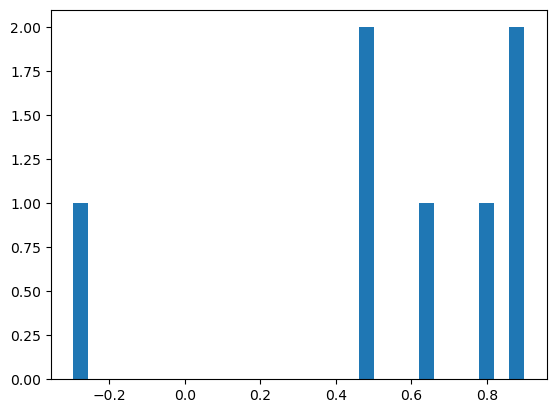

In [9]:
dt = (datetime.now() - timedelta(days=7)).strftime("%d-%b-%Y")
return_articles = get_articles_sentiments(keywrd= 'TSLA stock', startd = dt, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)
print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)

In [10]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head()

,Sentiment,URL,Description,Title
4,-0.2960,https://ryueyes11.tistory.com/17650,"흔히들 '스쿼트, 크로스핏, 파워리프팅 슈즈'로 알려진 '역도화'하면 '아디다스, ...",국가의 지도자와 기업의 오너에 관한 상관관계
0,0.4767,https://www.forbes.com/sites/bill_stone/2024/0...,Improving expectations for economic growth sen...,Stocks Rise Despite Higher Bond Yields
6,0.4909,https://www.americanthinker.com/blog/2024/02/a...,"In 2000, the Nasdaq stock market index, in a m...",Analysis of an asset bubble
2,0.6249,https://biztoc.com/x/03262f03a85aff0c,"In this week's video, I cover need-to-know new...",The Truth About Tesla Stock: Should You Buy Now?
5,0.7906,https://www.etfdailynews.com/2024/02/10/wealth...,WealthPlan Investment Management LLC boosted i...,WealthPlan Investment Management LLC Has $3.22...


In [11]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].tail()

,Sentiment,URL,Description,Title
5,0.7906,https://www.etfdailynews.com/2024/02/10/wealth...,WealthPlan Investment Management LLC boosted i...,WealthPlan Investment Management LLC Has $3.22...
2,0.6249,https://biztoc.com/x/03262f03a85aff0c,"In this week's video, I cover need-to-know new...",The Truth About Tesla Stock: Should You Buy Now?
6,0.4909,https://www.americanthinker.com/blog/2024/02/a...,"In 2000, the Nasdaq stock market index, in a m...",Analysis of an asset bubble
0,0.4767,https://www.forbes.com/sites/bill_stone/2024/0...,Improving expectations for economic growth sen...,Stocks Rise Despite Higher Bond Yields
4,-0.2960,https://ryueyes11.tistory.com/17650,"흔히들 '스쿼트, 크로스핏, 파워리프팅 슈즈'로 알려진 '역도화'하면 '아디다스, ...",국가의 지도자와 기업의 오너에 관한 상관관계
